# Setup

In [1]:
# !pip install zadeh

In [6]:
import zadeh
import matplotlib.pyplot as plt
import matplotlib as mpl

# set default matplotlib config
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 0.9
plt.style.use('ggplot')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["green", "yellow", "orange", "red"]) 
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 8

# Variables

**Step 1. Define the input variables**

The linguistic variables are:

1. ``slum_population``: Proportion of urban population living in slum, in percentage terms [%]
2. ``matter_concentration``: Annual mean concentration of particulate matter of less than 2.5 microns in diameter (PM2.5) [mg/m3]
3. ``water_access``: Access to improved water source, in percentage terms of urban population [%]
4. ``public_transport_satisfaction``: Satisfaction with public transport, in percentage [%]
5. ``rent_overburden_population``: Population with rent overburden, in percentage [%]


**Step 2. Fuzzification**

These real variables are transformed into fuzzy variables as follows:

The *universe of discourse* $X_i$ is defined by means of a minimum, maximum and number of steps between those for each variable $\nu_i$. For percentage variables, $X_i = [0, 100]$ by definition and the number of steps is set to 1000. Below, the *fuzzy sets* are completely characterized by defining the subset of values $A^{i}_{j} \subseteq X_i$ and its *membership function* $\mu_{A^{i}_{j}}(x) = \{ (x, \mu_{A^{i}_{j}}(x))| x \in X_i, \mu_{A^{i}_{j}}(x) \in [0, 1]\}$.

There are multiple shapes to define the membership function, but we are using bell-shaped ones and sigmoids.

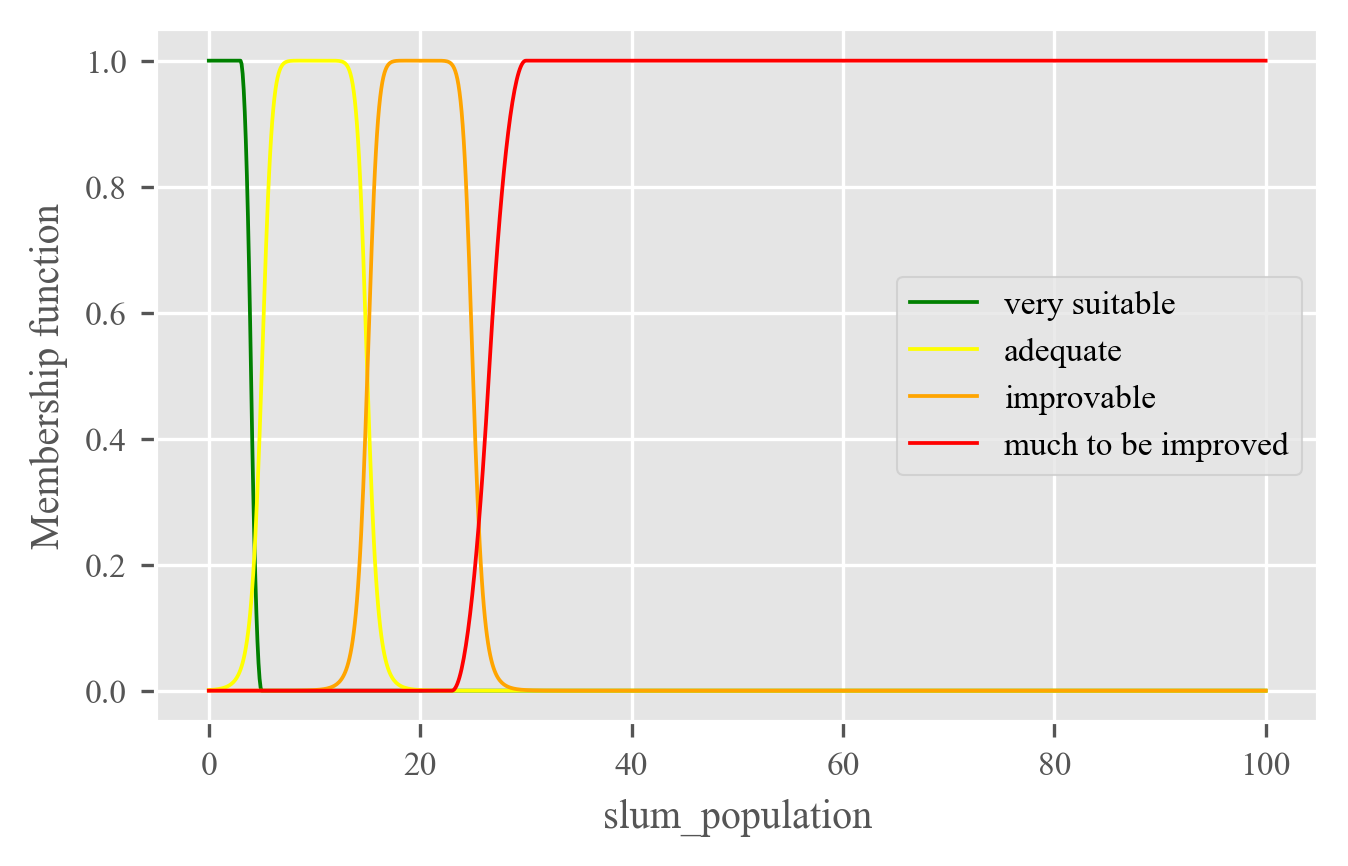

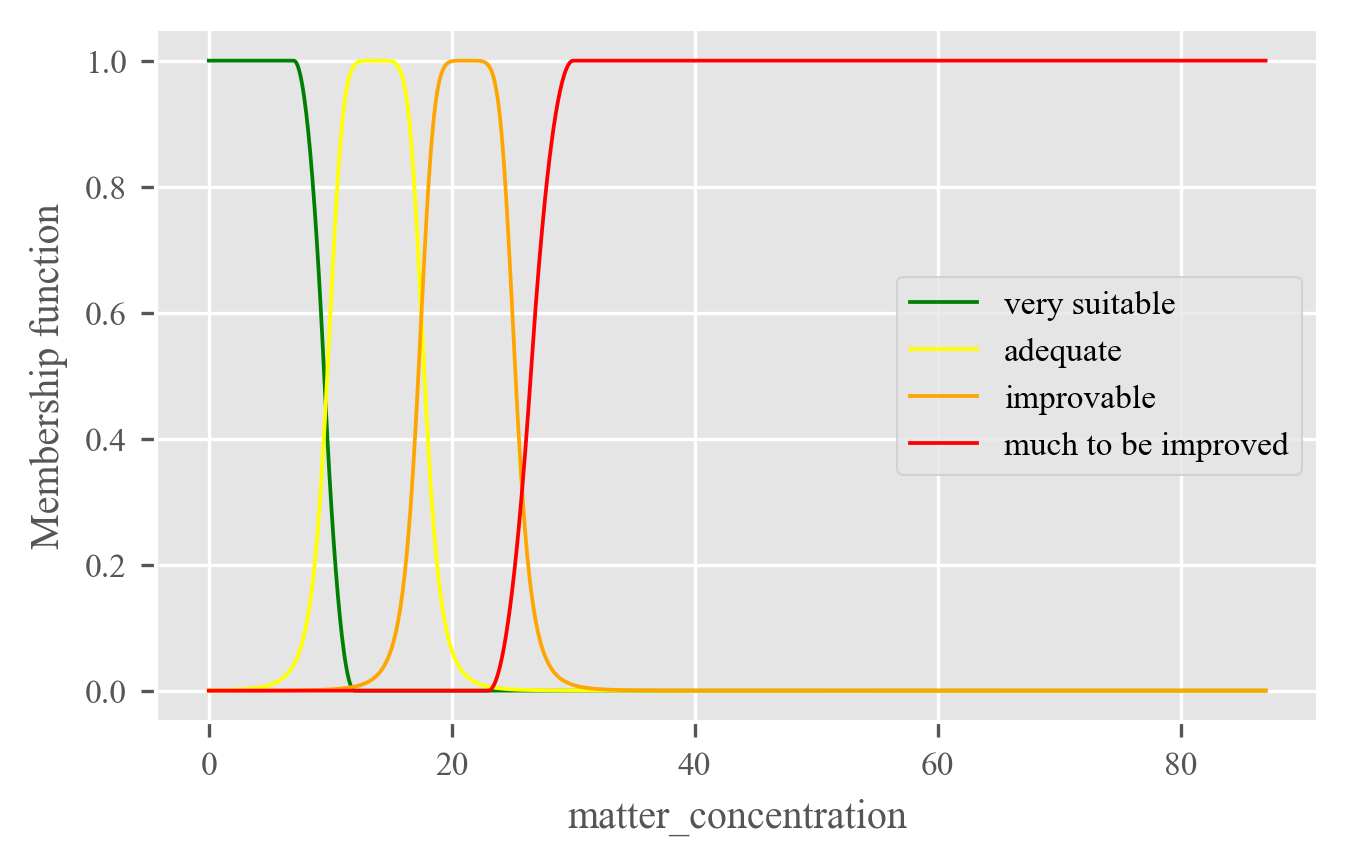

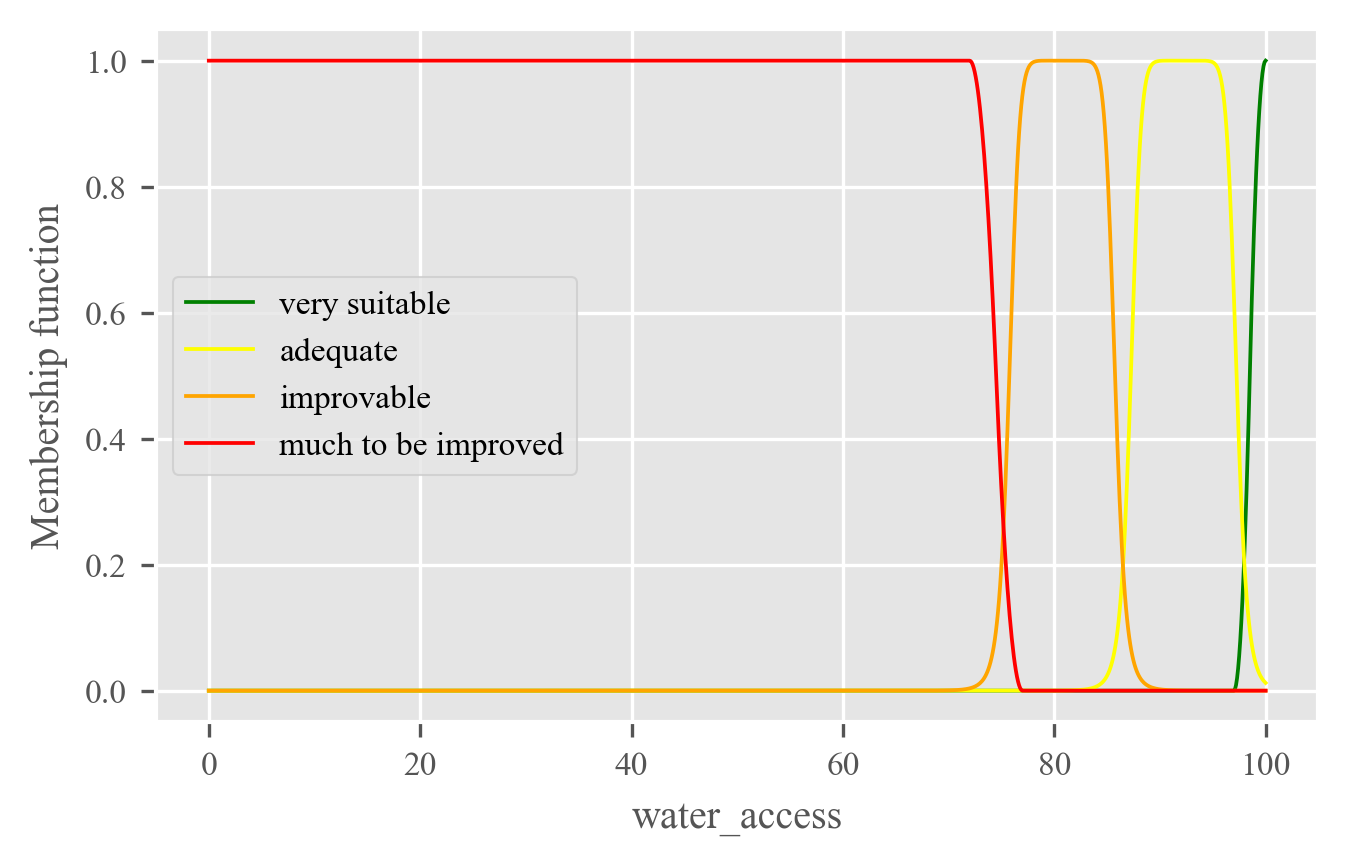

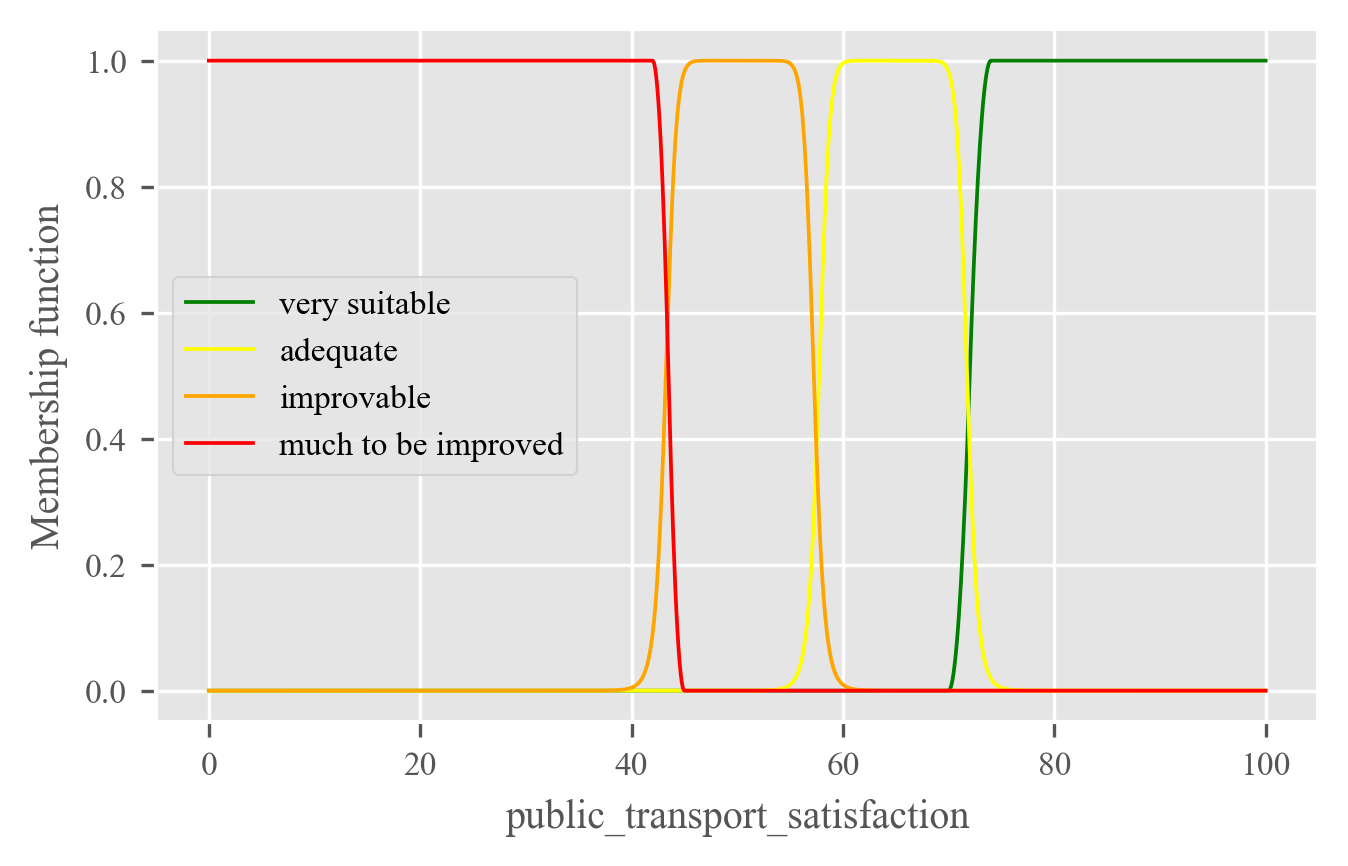

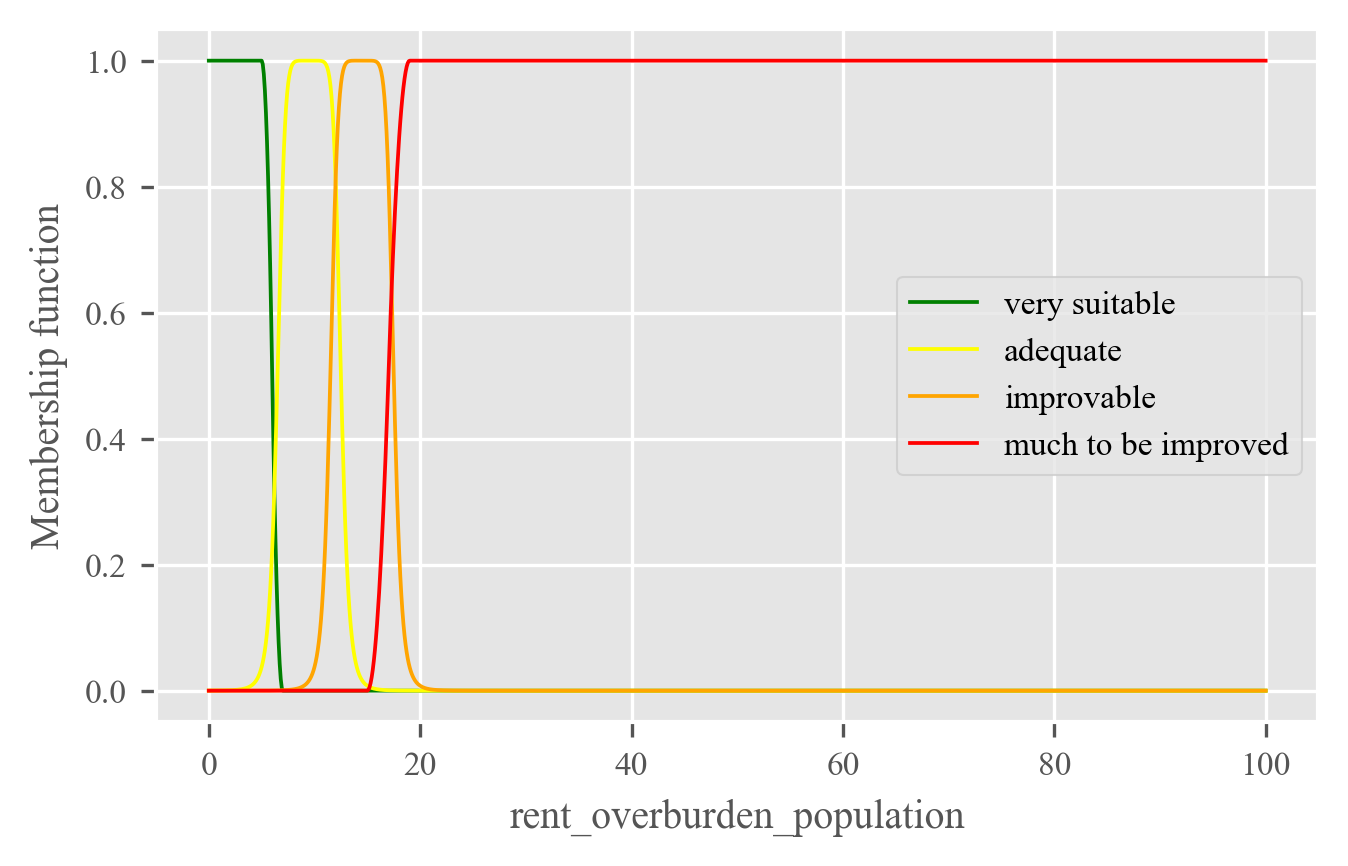

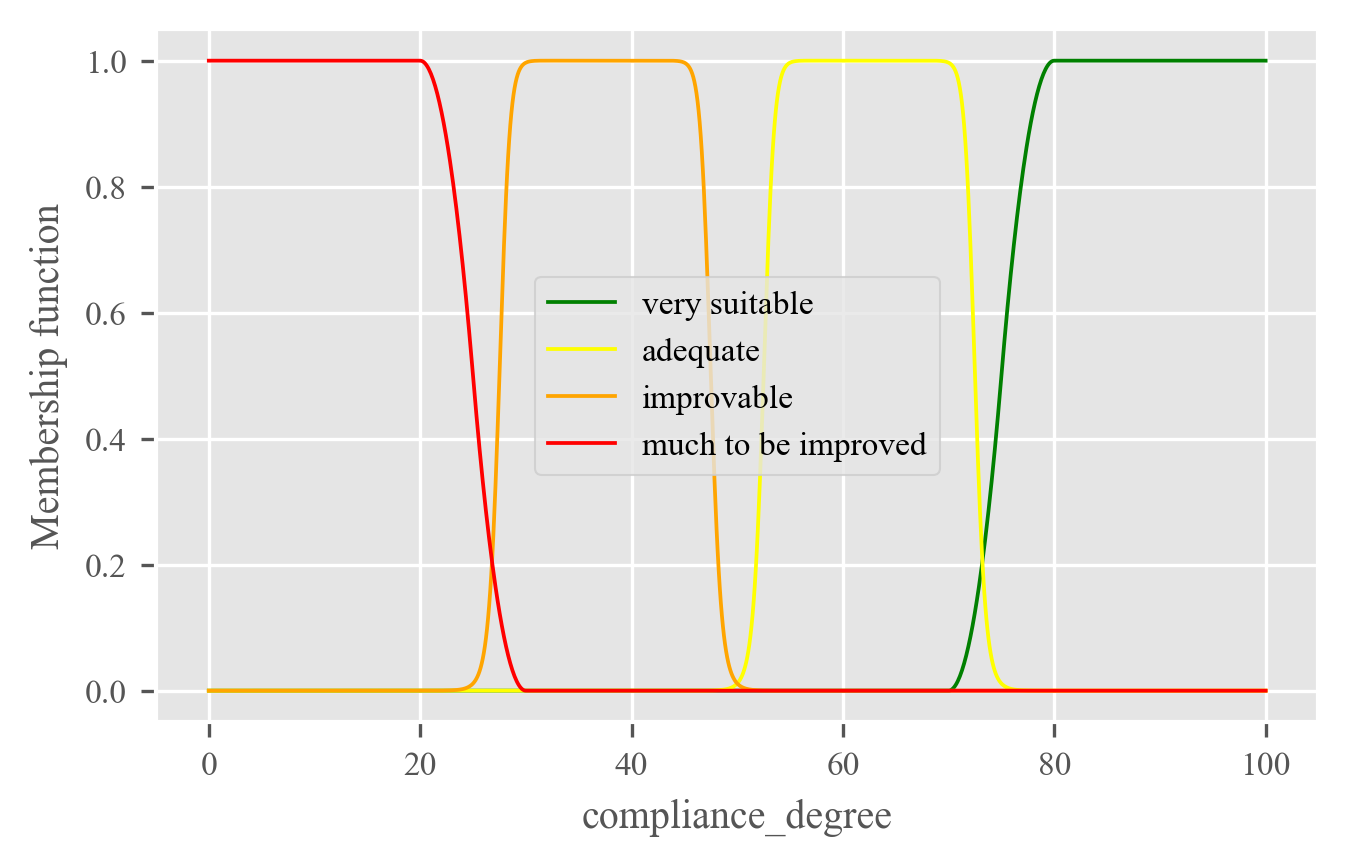

In [7]:
# variable definition
slum_population = zadeh.FuzzyVariable(
    zadeh.FloatDomain("slum_population", 0, 100, 1000),
    {
        'very suitable': zadeh.ZFuzzySet(3, 5),
        'adequate': zadeh.BellFuzzySet(5, 5, 10),
        'improvable': zadeh.BellFuzzySet(5, 5, 20),
        'much to be improved': zadeh.SFuzzySet(23, 30),
    },
)

matter_concentration = zadeh.FuzzyVariable(
    zadeh.FloatDomain("matter_concentration", 0, 87, 1000),
    {
        'very suitable': zadeh.ZFuzzySet(7, 12),
        'adequate': zadeh.BellFuzzySet(4, 3, 13.75),
        'improvable': zadeh.BellFuzzySet(4, 3, 21.25),
        'much to be improved': zadeh.SFuzzySet(23, 30),
    },
)

water_access = zadeh.FuzzyVariable(
    zadeh.FloatDomain("water_access", 0, 100, 1000),
    {
        'very suitable': zadeh.SFuzzySet(97, 100),
        'adequate': zadeh.BellFuzzySet(5, 5, 92.25),
        'improvable': zadeh.BellFuzzySet(5, 5, 80.75),
        'much to be improved': zadeh.ZFuzzySet(72, 77),

    },
)

public_transport_satisfaction = zadeh.FuzzyVariable(
    zadeh.FloatDomain("public_transport_satisfaction", 0, 100, 1000),
    {
        'very suitable': zadeh.SFuzzySet(70, 74),
        'adequate': zadeh.BellFuzzySet(7, 7, 64.75),
        'improvable': zadeh.BellFuzzySet(7, 7, 50.25),
        'much to be improved': zadeh.ZFuzzySet(42, 45),

    },
)

rent_overburden_population = zadeh.FuzzyVariable(
    zadeh.FloatDomain("rent_overburden_population", 0, 100, 1000),
    {
        'very suitable': zadeh.ZFuzzySet(5, 7),
        'adequate': zadeh.BellFuzzySet(3, 4, 9.5),
        'improvable': zadeh.BellFuzzySet(3, 4, 14.5),
        'much to be improved': zadeh.SFuzzySet(15, 19),
    },
)

# OUTPUT
compliance_degree = zadeh.FuzzyVariable(
    zadeh.FloatDomain("compliance_degree", 0, 100, 1000),
    {
        'very suitable': zadeh.SFuzzySet(70, 80),
        'adequate': zadeh.BellFuzzySet(10, 10, 62.5),
        'improvable': zadeh.BellFuzzySet(10, 10, 37.5),
        'much to be improved': zadeh.ZFuzzySet(20, 30),

    },
)

slum_population.plot()
plt.show()
matter_concentration.plot()
plt.show()
water_access.plot()
plt.show()
public_transport_satisfaction.plot()
plt.show()
rent_overburden_population.plot()
plt.show()
compliance_degree.plot()
plt.show()

In [8]:
# store linguistic variables as a list

INPUTS = [slum_population,
          matter_concentration,
          water_access,
          public_transport_satisfaction,
          rent_overburden_population]

In [9]:
REVERSED = [slum_population,
            matter_concentration,
            rent_overburden_population
            ]


NOT_REVERSED = [water_access,
                public_transport_satisfaction
                ]

# Rules

**Step 3. Criteria and **

In [17]:
reversed = [zadeh.FuzzyRuleSet.automatic(
    input_var, compliance_degree, reverse=True, weight=1, 
) for input_var in REVERSED]

not_reversed = [zadeh.FuzzyRuleSet.automatic(
    input_var, compliance_degree, reverse=False, weight=1, 
) for input_var in NOT_REVERSED]

rule_set = reversed+not_reversed

# for rule in rule_set:
#     print(rule)

# Build fuzzy inference system

In [12]:
fis = zadeh.FIS(INPUTS, rule_set, compliance_degree, defuzzification='centroid')

In [13]:
IRELAND = {'slum_population': 0,
            'matter_concentration': 7.8, 
            'water_access': 97,
            'public_transport_satisfaction': 61, 
            'rent_overburden_population': 5.6
} 

In [14]:
fis.get_crisp_output(IRELAND)

76.31506079848413

In [16]:
# fis.plot_rules(IRELAND)